## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №2

Задание выполнил(а): Генов Александр

### Общая информация

__Дата выдачи:__ 25.02.2019

__Дедлайн:__ 23:59 5.03.2019

### О задании

В данном домашнем задании вы реализуете линейную регрессию своими руками и сравните её с версией в scikit-learn.

### Оценивание и штрафы

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

__Стирать условия нельзя!__

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_02_Фамилия_Имя.ipynb

## Часть 1. Обыкновенная линейная регрессия

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 1 (4 балла). 
На семинаре мы начали реализовывать класс линейной регрессии; теперь необходимо его закончить. 

In [ ]:
class LinReg():
    def __init__(self, step_size=0.1, num_steps=20, eps=1e-6):
        self.w = None
        self.step_size = step_size
        self.num_steps = num_steps
        self.eps = eps
   
    def __calc_grad(self, X_train, y_train):
        self.w -= self.step_size * (np.dot(2 / X_train.shape[0] * X_train.T, np.transpose(np.dot(X_train, self.w)) - y_train))
   
    def fit(self, X_train, y_train):
        self.w = np.zeros(X_train.shape[1])
        for i in range(self.num_steps):
            w_cur = self.w.copy()
            self.__calc_grad(X_train,y_train)
            if np.linalg.norm(self.w - w_cur) < self.eps:
                break
        return self
       
    def predict(self, X_test):
        return np.dot(X_test, self.w)

### 2 (3 балла). 
Проверим корректность работы класса на датасете Boston Housing. 
* Загрузите его из sklearn
* Проведите предобработку данных(нормализация вещественных признаков, one-hot encoding категориальных)
* Разделите на обучение и контроль в соотношении 80:20 с random_seed 42 (самый популярный в прошлом задании)
* Обучите собственную реализацию регрессии и сравните по метрикам MAE и RMSE с LinearRegression из sklearn.

In [ ]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.describe()

In [ ]:
df.head()

Все признаки являются вещественными, кроме 'CHAS'

In [ ]:
numeric_column = boston.feature_names[boston.feature_names != 'CHAS'] 

Разделим на обучение и контроль в соотношении 80:20 с random_seed 42 

In [27]:
X_train_0, X_test_0, y_train, y_test = train_test_split(df, boston.target, test_size=0.2, random_state = 42) #

In [28]:
from future_encoders import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

Проведем нормализация вещественных признаков и one-hot encoding категориальных

In [29]:
tf = ColumnTransformer(transformers=[('Standard Scaler', StandardScaler(), numeric_column),('One Hot', OneHotEncoder(), ['CHAS'])
])
X_train = tf.fit_transform(X_train_0)
X_test = tf.transform(X_test_0)
X_train_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 477 to 102
Data columns (total 13 columns):
CRIM       404 non-null float64
ZN         404 non-null float64
INDUS      404 non-null float64
CHAS       404 non-null float64
NOX        404 non-null float64
RM         404 non-null float64
AGE        404 non-null float64
DIS        404 non-null float64
RAD        404 non-null float64
TAX        404 non-null float64
PTRATIO    404 non-null float64
B          404 non-null float64
LSTAT      404 non-null float64
dtypes: float64(13)
memory usage: 44.2 KB


In [30]:
myreg = LinReg(num_steps = 200)
myreg.fit(X_train, y_train)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [32]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Сравнение по метрике RMSE с LinearRegression из sklearn.

In [33]:
np.sqrt(mean_squared_error(myreg.predict(X_test), y_test))

4.9473295256789624

In [34]:
np.sqrt(mean_squared_error(reg.predict(X_test), y_test))

4.930661915979771

Сравнение по метрике MAE с LinearRegression из sklearn.

In [35]:
mean_absolute_error(myreg.predict(X_test), y_test)

3.196986763157114

In [36]:
mean_absolute_error(reg.predict(X_test), y_test)

3.1915089722748045

### 3 (3 балла). 
Линейная регрессия зачастую легко переобучается - модель необходимо штрафовать за величину весов; для этого применяют L1 и L2 регуляризацию: добавление нормы весов к функции потерь. В случае L2-регулязации функционал будет выглядеть как

$$ L = (Xw - y)^T(Xw - y) + \lambda||w||_2 $$.

Параметр $\lambda$ подбирается на отложенной выборке или по кросс-валидации.

* Реализуйте обучение линейной регрессии с L2-регуляризацией
* Найдите оптимальный с точки зрения метрики MAE коэффициент $\lambda$ (по кросс-валидации)
* Постройте график зависимости метрики на тестовой выборке от $\lambda$ (__подпишите оси__)
* Сравните результаты с Ridge регрессией из sklearn (аналогично пункту 2).

In [37]:
class LinRegL2():
    def __init__(self, step_size=0.1, num_steps=20, eps=1e-6, lamb = 0.1):
        self.w = None
        self.step_size = step_size
        self.num_steps = num_steps
        self.lamb = lamb
        self.eps = eps
   
    def __calc_grad(self, X_train, y_train):
        self.w -= self.step_size * (np.dot(2 / X_train.shape[0] * X_train.T, np.transpose(np.dot(X_train, self.w)) - y_train))+ 2 * self.lamb * self.w
   
    def fit(self, X_train, y_train):
        self.w = np.zeros(X_train.shape[1])
        for i in range(self.num_steps):
            w_cur = self.w.copy()
            self.__calc_grad(X_train,y_train)
            if np.linalg.norm(self.w - w_cur) < self.eps:
                break
        return self
       
    def predict(self, X_test):
        return np.dot(X_test, self.w)

In [38]:
from sklearn.model_selection import KFold

In [39]:
#Кросс-валидация по k блокам
kfold = KFold(n_splits = 5, random_state = 42)
lamb_val = np.linspace(1, 10, 10) / 1000

In [40]:
for lamb in lamb_val:
    scores = []
    for train_k, test_k in kfold.split(X_train, y_train):
        myreg_l2 = LinRegL2(num_steps=250, eps=1e-6, lamb=lamb)
        myreg_l2.fit(X_train[train_k], y_train[train_k])
        scores.append(mean_absolute_error(myreg_l2.predict(X_train[test_k]), y_train[test_k]))
    print("lamb: {}".format(lamb))
    print("Average cross-validation score: {:.9f}".format(np.mean(scores)))

lamb: 0.001
Average cross-validation score: 3.404156667
lamb: 0.002
Average cross-validation score: 3.475100820
lamb: 0.003
Average cross-validation score: 3.591437641
lamb: 0.004
Average cross-validation score: 3.713979646
lamb: 0.005
Average cross-validation score: 3.827436603
lamb: 0.006
Average cross-validation score: 3.933805156
lamb: 0.007
Average cross-validation score: 4.039227653
lamb: 0.008
Average cross-validation score: 4.146695242
lamb: 0.009
Average cross-validation score: 4.254466114
lamb: 0.01
Average cross-validation score: 4.364190740


После прохождения тестирования на каждом блоке, кросс валидация показала оптимальное, с точки зрения метрики MAE коэффицент лямбды, равный 0.001

In [41]:
myreg_l2 = LinRegL2(num_steps=250, eps=1e-6, lamb=0.001)
myreg_l2.fit(X_train, y_train)

In [47]:
mae_val = {}
for lamb in lamb_val:
    myreg_l2 = LinRegL2(num_steps=250, lamb=lamb)
    myreg_l2.fit(X_train, y_train)
    mae_val[lamb] = mean_absolute_error(myreg_l2.predict(X_test), y_test)

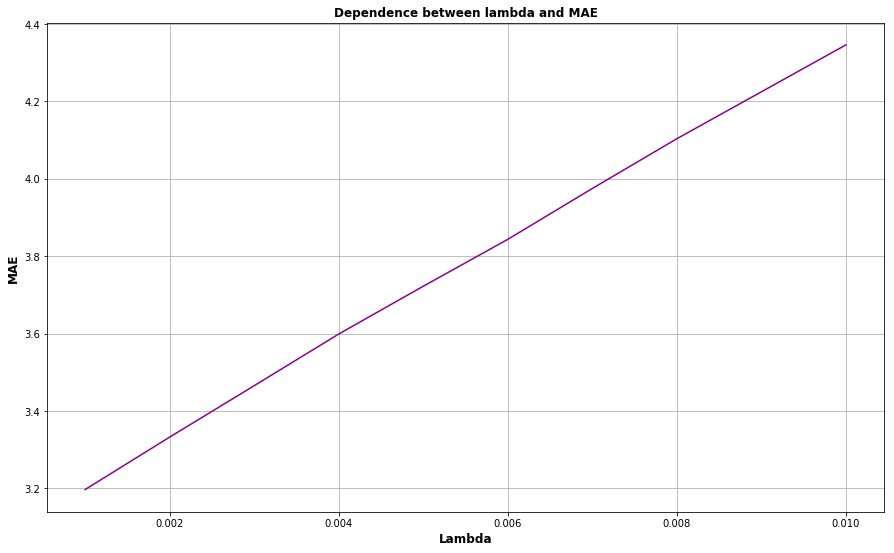

In [79]:
plt.figure(figsize=(15, 9))
plt.plot(list(mae_val.keys()),list(mae_val.values()), color = 'darkmagenta')
plt.xlabel('Lambda', fontsize='large', fontweight='bold')
plt.ylabel('MAE',fontsize='large', fontweight='bold')
plt.title('Dependence between lambda and MAE',fontsize='large', fontweight='bold')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_skl = Ridge(alpha=0.001, random_state=42) #Берем тот же параметр лямбды
ridge_skl.fit(X_train,y_train)

Сравнение результатов с точки зрения метрики MAE с Ridge регрессией из sklearn 

In [ ]:
mean_absolute_error(ridge.predict(X_test), y_test)

In [869]:
mean_absolute_error(myreg_l2.predict(X_test), y_test)

3.1970192260995987

### 4 (Бонус, 4 балла). 
* Реализуйте обучение линейной регрессии с L1-регуляризацией (класс RegL1)
* Проведите сравнения аналогично пункту 3 (но с Lasso вместо Ridge).

In [5]:
# your code here

### 5 (Бонус, 2 балла). 
Исследуйте для реализации регрессии с L2-регуляризацией зависимость качества на тестовой выборке (с графиками) от:
* Длины шага
* Количества шагов спуска
* Константы epsilon.

In [6]:
# your code here

### 6 (Бонус, 0 баллов). 
Вставьте сюда любимую картинку, которая сможет поднять настроение ассистенту и семинаристу